##본 실습내용은 이진원 강사님이 정리하신 내용입니다.


# Multi-Layer Perceptrons

이번 실습에서는 multi-layer perceptron을 이용하여 classification 문제를 풀어보겠습니다

In [ ]:
## 필요한 Library들을 import 합니다
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

## TensorFlow, Keras version 확인
print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.0


In [ ]:
np.random.seed(777) # random seed를 넣으면 결과가 비슷하게 나온다.
tf.random.set_seed(777)

## Coding Tips

#### 1. Hyper Parameter 정하기
#### 2. Data 준비(불러오기 or download 등)
#### 3. Dataset 구성 (tf.data.Dataset 이용)
#### 4. Model 만들기 (Neural Network model)
#### 5. Loss function 정의, Optimizer 선택
#### 6. Training (Train, Test function 만들기 포함)
#### 7. Validation(or Test) 결과 확인


### Fashion MNIST(MNIST) Dataset 분류

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 [패션 MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터셋을 사용하겠습니다. 이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 옷 품목을 나타냅니다:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>그림</b> <a href="https://github.com/zalandoresearch/fashion-mnist">패션-MNIST 샘플</a> (Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

패션 MNIST는 컴퓨터 비전 분야의 "Hello, World" 프로그램격인 고전 [MNIST](http://yann.lecun.com/exdb/mnist/) 데이터셋을 대신해서 자주 사용됩니다. MNIST 데이터셋은 손글씨 숫자(0, 1, 2 등)의 이미지로 이루어져 있습니다. 여기서 사용하려는 옷 이미지와 동일한 포맷입니다.

패션 MNIST는 일반적인 MNIST 보다 조금 더 어려운 문제이고 다양한 예제를 만들기 위해 선택했습니다. 두 데이터셋은 비교적 작기 때문에 알고리즘의 작동 여부를 확인하기 위해 사용되곤 합니다. 코드를 테스트하고 디버깅하는 용도로 좋습니다.

네트워크를 훈련하는데 60,000개의 이미지를 사용합니다. 그다음 네트워크가 얼마나 정확하게 이미지를 분류하는지 10,000개의 이미지로 평가하겠습니다. 패션 MNIST 데이터셋은 텐서플로에서 바로 임포트하여 적재할 수 있습니다:

이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이입니다. *레이블*(label)은 0에서 9까지의 정수 배열입니다. 이 값은 이미지에 있는 옷의 *클래스*(class)를 나타냅니다:

<table>
  <tr>
    <th>레이블</th>
    <th>클래스</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

각 이미지는 하나의 레이블에 매핑되어 있습니다. 데이터셋에 *클래스 이름*이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장합니다

In [ ]:
## Hyper-parameters
learning_rate = 0.001
N_EPOCHS = 30
N_BATCH = 100
N_CLASS = 10

In [ ]:
## MNIST Dataset #########################################################
#mnist = keras.datasets.mnist
#class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
##########################################################################

## Fashion MNIST Dataset #################################################
mnist = keras.datasets.fashion_mnist
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
##########################################################################

In [ ]:
## MNIST dataset load
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
## train_images, train_labels의 shape 확인
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [ ]:
print(train_labels[1])

0


In [ ]:
## test_images, test_labels의 shape 확인
test_images.shape, test_labels.shape   # (5,) --> ,는 튜플임을 나타낸다.

((10000, 28, 28), (10000,))

In [ ]:
## training set의 각 class 별 image 수 확인
unique, counts = np.unique(train_labels, axis=-1, return_counts=True)
dict(zip(unique, counts))

{0: 6000,
 1: 6000,
 2: 6000,
 3: 6000,
 4: 6000,
 5: 6000,
 6: 6000,
 7: 6000,
 8: 6000,
 9: 6000}

In [ ]:
## test set의 각 class 별 image 수 확인
unique, counts = np.unique(test_labels, axis=-1, return_counts=True)
dict(zip(unique, counts))

{0: 1000,
 1: 1000,
 2: 1000,
 3: 1000,
 4: 1000,
 5: 1000,
 6: 1000,
 7: 1000,
 8: 1000,
 9: 1000}

In [ ]:
N_TRAIN = train_images.shape[0]
N_TEST = test_images.shape[0]
print(N_TRAIN)
print(N_TEST)

60000
10000


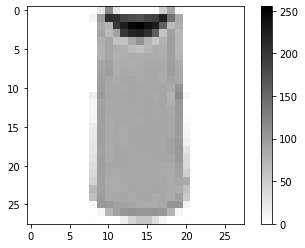

In [ ]:
## train_images의 0번 image 화면에 출력
plt.figure()
plt.imshow(train_images[2], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

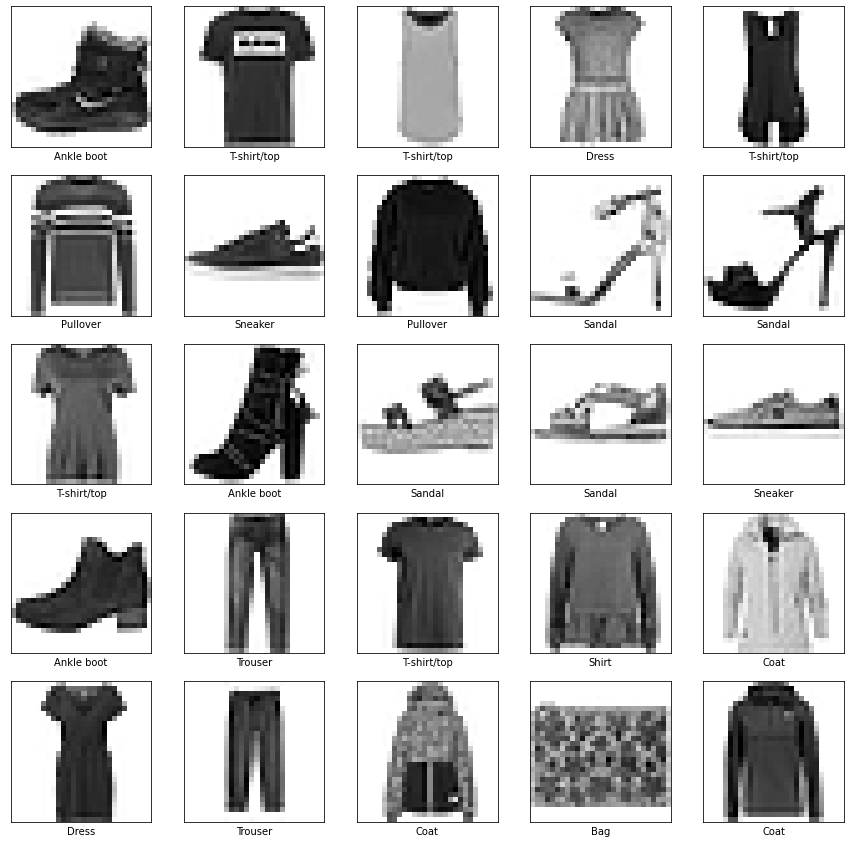

In [ ]:
## 25개의 train image와 label 화면에 출력
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [ ]:
## image를 0~1사이 값으로 만들기 위하여 255로 나누어줌
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

## one-hot encoding
train_labels = keras.utils.to_categorical(train_labels, N_CLASS)
test_labels = keras.utils.to_categorical(test_labels, N_CLASS)

In [ ]:
## dataset 구성    
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(N_BATCH).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(N_BATCH)

In [ ]:
## model function
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))  #batch사이즈는 빼고 쓴다. 한 개 데이터의 사이즈에 대해서만 쓴다.
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [ ]:
## Create model, compile & summary
model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy', # loss='sparse_categorical_crossentropy' 를 하면 one-hot encoding을 자동으로 해준다.
              metrics=['accuracy'])   #metrics=['accuracy','loss']) 이런식으로 여러개를 보려고 하면 쓸 수 있다
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## Parameters for training
steps_per_epoch = N_TRAIN//N_BATCH
validation_steps = N_TEST//N_BATCH
print(steps_per_epoch, validation_steps)

600 100


In [ ]:
## Training
history = model.fit(train_dataset, epochs=N_EPOCHS, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Epoch 1/30
600/600 [==============================] - 5s 4ms/step - loss: 0.6568 - accuracy: 0.7743 - val_loss: 0.4233 - val_accuracy: 0.8505
Epoch 2/30
600/600 [==============================] - 2s 3ms/step - loss: 0.3711 - accuracy: 0.8660 - val_loss: 0.3721 - val_accuracy: 0.8642
Epoch 3/30
600/600 [==============================] - 2s 3ms/step - loss: 0.3236 - accuracy: 0.8793 - val_loss: 0.3484 - val_accuracy: 0.8740
Epoch 4/30
600/600 [==============================] - 2s 3ms/step - loss: 0.3009 - accuracy: 0.8882 - val_loss: 0.3633 - val_accuracy: 0.8720
Epoch 5/30
600/600 [==============================] - 2s 3ms/step - loss: 0.2844 - accuracy: 0.8943 - val_loss: 0.3464 - val_accuracy: 0.8751
Epoch 6/30
600/600 [==============================] - 2s 3ms/step - loss: 0.2615 - accuracy: 0.9020 - val_loss: 0.3341 - val_accuracy: 0.8756
Epoch 7/30
600/600 [==============================] - 2s 3ms/step - loss: 0.2574 - accuracy: 0.9040 - val_loss: 0.3489 - val_accuracy: 0.8782
Epoch 

In [ ]:
model.evaluate(test_dataset)

100/100 [==============================] - 0s 3ms/step - loss: 0.4017 - accuracy: 0.8933


[0.40174317359924316, 0.8932999968528748]

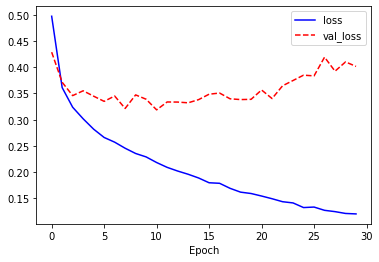

In [ ]:
## Plot losses
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

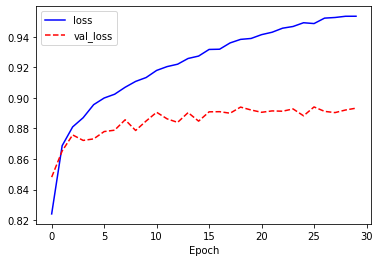

In [ ]:
## Plot losses
plt.plot(history.history['accuracy'], 'b-', label='loss')
plt.plot(history.history['val_accuracy'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
## 결과 확
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img,cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    #plt.xticks([])
    plt.xticks(range(N_CLASS), class_names, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(N_CLASS), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

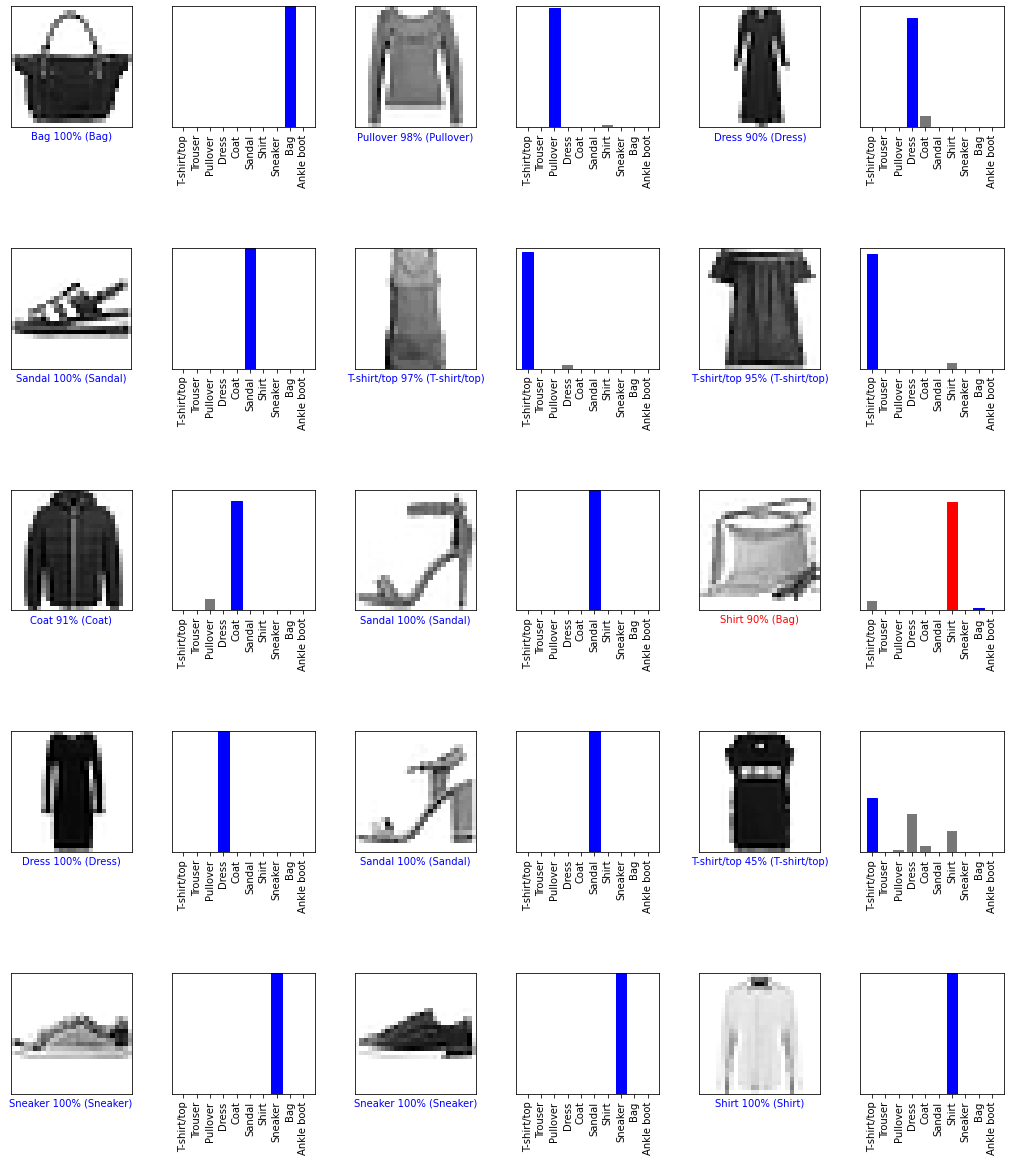

In [ ]:
rnd_idx = np.random.randint(1, N_TEST//N_BATCH)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

# Convolutional Neural Network
이번 실습에서는 MNIST data를 이용하여 CNN을 학습하고 MLP와 결과를 비교해보겠습니다.

또한, 학습된 model을 저장하는 방법을 알아보고,

Sequential API 외에 Functional API를 사용하여 model을 만드는 방법에 대해서 알아보겠습니다.

In [ ]:
## 필요한 Library들을 import 합니다
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

## TensorFlow, Keras version 확인
print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.0


In [ ]:
np.random.seed(777)
tf.random.set_seed(777)

Coding Tips
1. Hyper Paramter 정하기
2. Data 준비(불러오기 or download 등)
3. Dataset 구성 (tf.data.Dataset 이용)
4. Modlel 만들기 (Neural Network model)
5. Loss function 정의, Optimizer 선택
6. Training (Train, Test function 만들기 포함)
7. Validation(or Test) 결과 확인

In [ ]:
## Hyper-parameters
learning_rate = 0.001
N_EPOCHS = 20
N_BATCH = 100
N_CLASS = 10

In [ ]:
## MNIST Dataset #########################################################
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
##########################################################################

## Fashion MNIST Dataset #################################################
#mnist = keras.datasets.fashion_mnist
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
##########################################################################

In [ ]:
## MNIST dataset load
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
N_TRAIN = train_images.shape[0]
N_TEST = test_images.shape[0]

In [ ]:
# pixel값을 0~1사이 범위로 조정
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.
# CNN에 입력으로 넣기 위해 3차원->4차원으로 변경(channel에 1을 추가)
train_images = train_images[..., tf.newaxis]  #train_images = train_images[:,:,:, tf.newaxis] --> 이렇게 써도 된다.
test_images = test_images[..., tf.newaxis]
# label을 onehot-encoding
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

In [ ]:
train_images.shape

(60000, 28, 28, 1)

In [ ]:
## dataset 구성    
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(N_BATCH).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(N_BATCH)

## Sequential API

In [ ]:
# Sequential API를 사용하여 model 구성
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='SAME', 
                                  input_shape=(28, 28, 1)))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [ ]:
## Create model, compile & summary
model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
#              loss='sparse_categorical_crossentropy',
              loss='categorical_crossentropy', # loss='sparse_categorical_crossentropy' 를 하면 one-hot encoding을 자동으로 해준다.
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)             

In [ ]:
## 학습 전에 결과 확인
model.evaluate(test_dataset)

100/100 [==============================] - 30s 4ms/step - loss: 2.2978 - accuracy: 0.1447


[2.2976839542388916, 0.13660000264644623]

In [ ]:
## Parameters for training
steps_per_epoch = N_TRAIN//N_BATCH
validation_steps = N_TEST//N_BATCH
print(steps_per_epoch, validation_steps)

600 100


In [ ]:
## Training
history = model.fit(train_dataset, epochs=N_EPOCHS, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Epoch 1/20
600/600 [==============================] - 4s 6ms/step - loss: 0.1950 - accuracy: 0.9381 - val_loss: 0.0530 - val_accuracy: 0.9815
Epoch 2/20
600/600 [==============================] - 3s 6ms/step - loss: 0.0592 - accuracy: 0.9827 - val_loss: 0.0261 - val_accuracy: 0.9911
Epoch 3/20
600/600 [==============================] - 3s 6ms/step - loss: 0.0395 - accuracy: 0.9879 - val_loss: 0.0293 - val_accuracy: 0.9902
Epoch 4/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0317 - accuracy: 0.9901 - val_loss: 0.0252 - val_accuracy: 0.9919
Epoch 5/20
600/600 [==============================] - 3s 6ms/step - loss: 0.0241 - accuracy: 0.9926 - val_loss: 0.0219 - val_accuracy: 0.9922
Epoch 6/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0227 - accuracy: 0.9928 - val_loss: 0.0278 - val_accuracy: 0.9914
Epoch 7/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0185 - accuracy: 0.9941 - val_loss: 0.0254 - val_accuracy: 0.9919
Epoch 

In [ ]:
## 결과 확인
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[:,:,0],cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    #plt.xticks([])
    plt.xticks(range(N_CLASS), class_names, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(N_CLASS), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

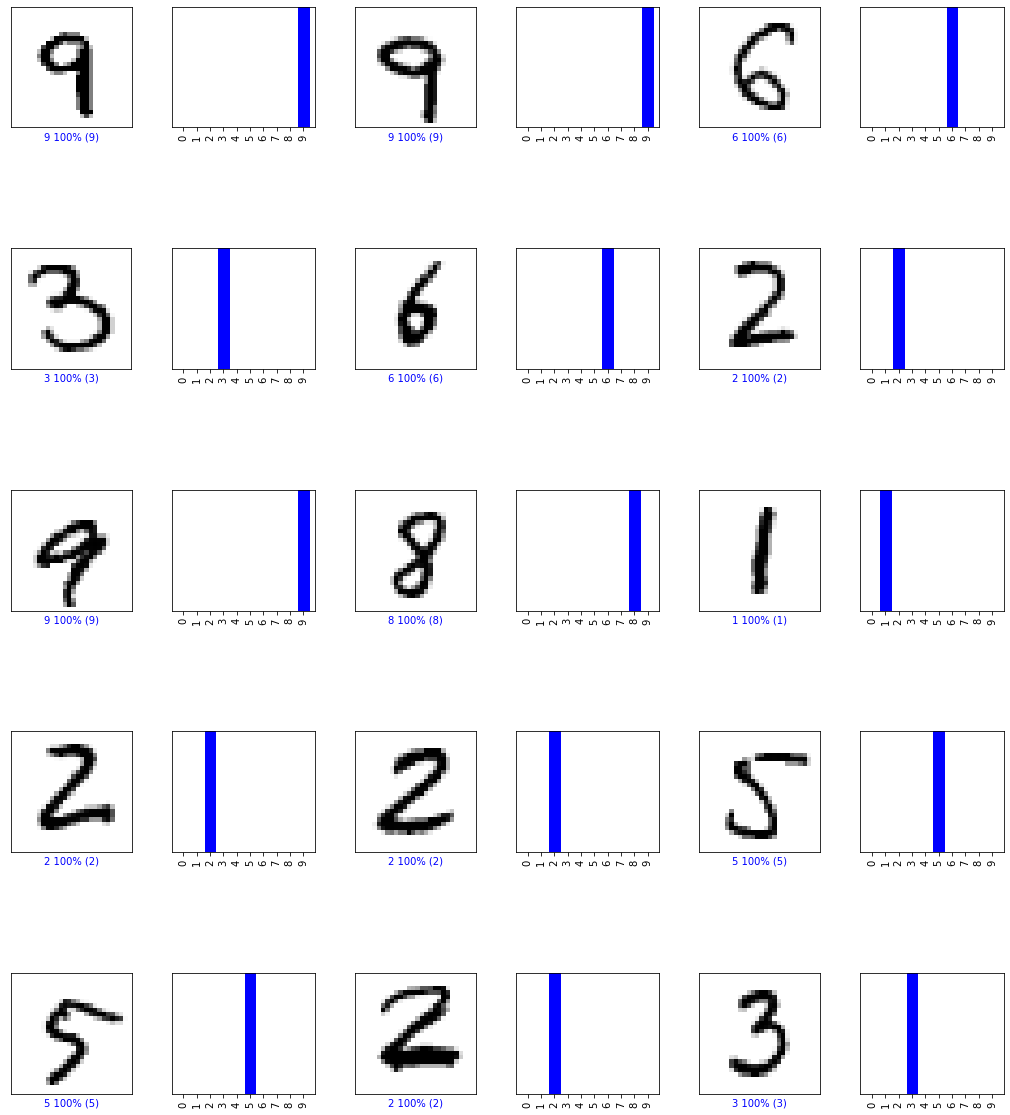

In [ ]:
rnd_idx = np.random.randint(1, N_TEST//N_BATCH)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

## Weight 저장하고 불러오기

In [ ]:
## Creating a checkpoint directory
cur_dir = os.getcwd()
ckpt_dir_name = 'checkpoints'
model_dir_name = 'mnist_cnn_keras'
ckpt_name = 'mnist_cnn_keras.ckpt'

checkpoint_dir = os.path.join(cur_dir, ckpt_dir_name, model_dir_name)
os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_path = os.path.join(checkpoint_dir, ckpt_name)

In [ ]:
## Saving weights
model.save_weights(checkpoint_path)

In [ ]:
## 확인
!ls 'checkpoints/mnist_cnn_keras'

checkpoint				  mnist_cnn_keras.ckpt.index
mnist_cnn_keras.ckpt.data-00000-of-00001


In [ ]:
## Creating a new model
new_model1 = create_model()
new_model1.compile(optimizer=keras.optimizers.Adam(learning_rate),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
new_model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)             

In [ ]:
## 학습 전에 결과 확인
new_model1.evaluate(test_dataset)

100/100 [==============================] - 1s 4ms/step - loss: 2.3047 - accuracy: 0.1144


[2.3055155277252197, 0.1006999984383583]

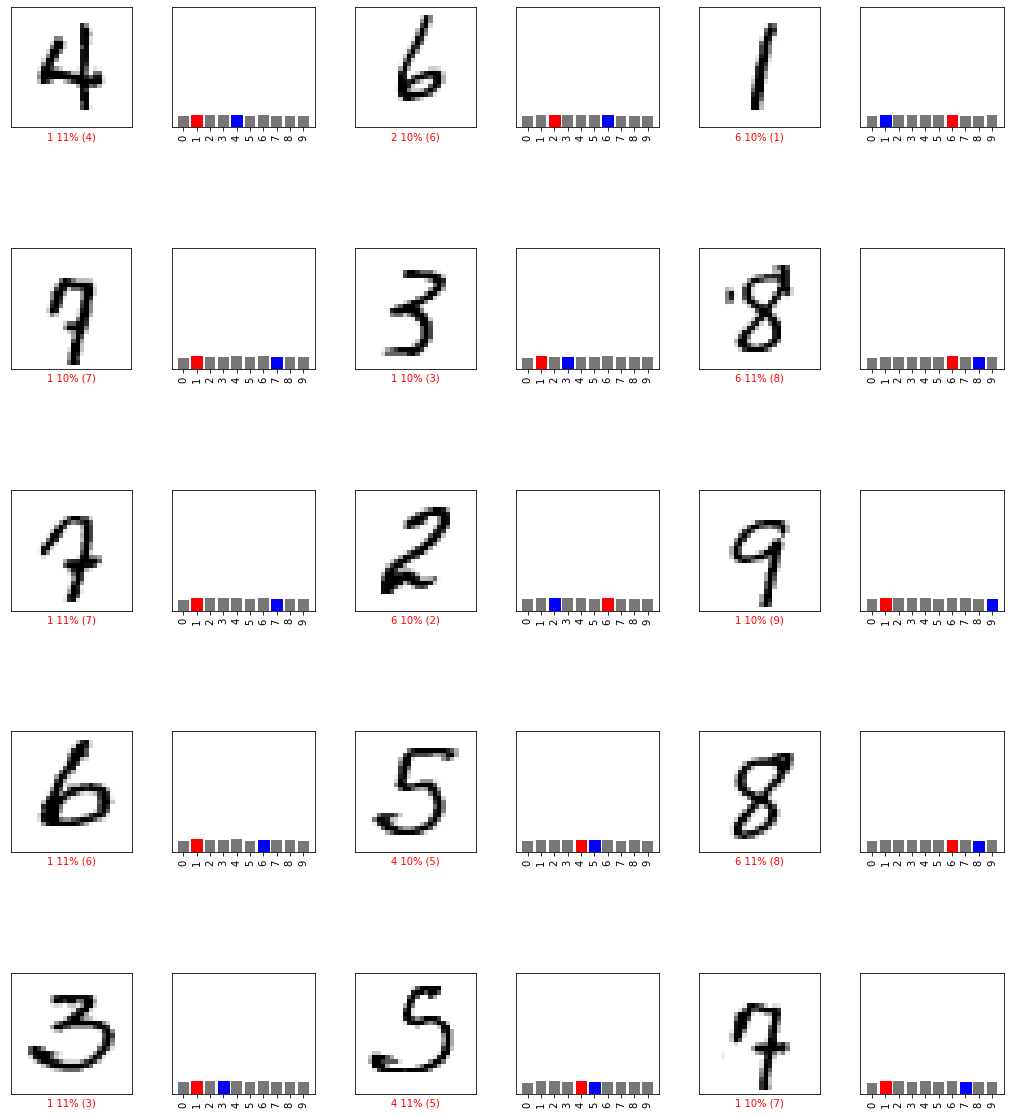

In [ ]:
rnd_idx = np.random.randint(1, N_TEST//N_BATCH)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = new_model1(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

In [ ]:
## Restore weights
new_model1.load_weights(checkpoint_path)

In [ ]:
## 결과 확인
new_model1.evaluate(test_dataset)

100/100 [==============================] - 0s 4ms/step - loss: 0.0337 - accuracy: 0.9930


[0.03365772217512131, 0.9929999709129333]

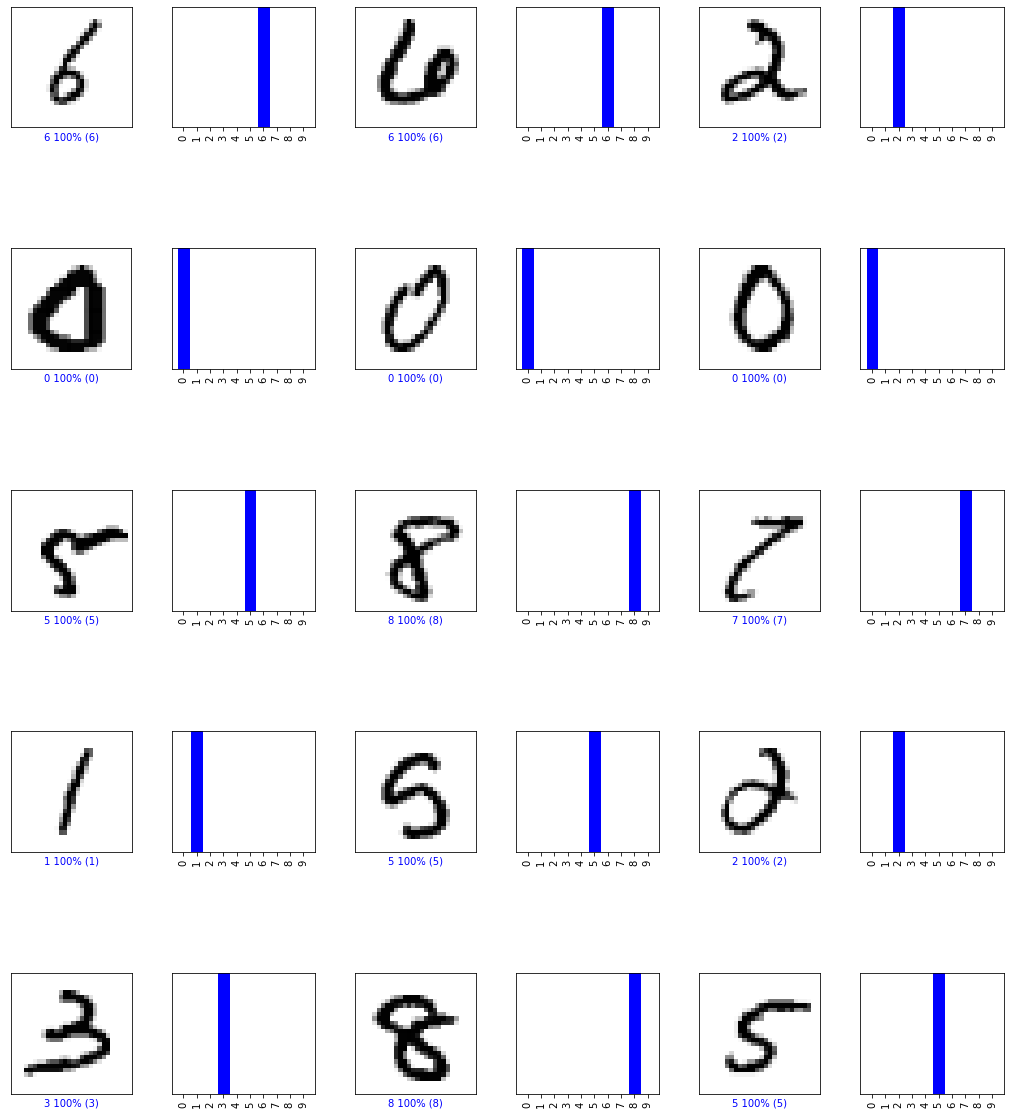

In [ ]:
rnd_idx = np.random.randint(1, N_TEST//N_BATCH)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = new_model1(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

## Callback 사용하여 저장하기

In [ ]:
## 새로운 model 생성
model = create_model()

## model compile
model.compile(optimizer=keras.optimizers.Adam(learning_rate),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2048)             

In [ ]:
## 학습 전에 결과 확인
model.evaluate(test_dataset)

100/100 [==============================] - 1s 4ms/step - loss: 2.3057 - accuracy: 0.1007


[2.306016683578491, 0.10090000182390213]

In [ ]:
ckpt_name = 'mnist_cnn_{epoch:04d}.ckpt'
checkpoint_path = os.path.join(checkpoint_dir, ckpt_name)

# callback 만들기
cp_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                              save_weights_only=True)

## Training
history = model.fit(train_dataset, epochs=N_EPOCHS, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps,
                    callbacks=[cp_callback])

Epoch 1/20
600/600 [==============================] - 4s 6ms/step - loss: 0.2013 - accuracy: 0.9360 - val_loss: 0.0415 - val_accuracy: 0.9862
Epoch 2/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0545 - accuracy: 0.9839 - val_loss: 0.0307 - val_accuracy: 0.9887
Epoch 3/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0400 - accuracy: 0.9877 - val_loss: 0.0265 - val_accuracy: 0.9908
Epoch 4/20
600/600 [==============================] - 3s 6ms/step - loss: 0.0289 - accuracy: 0.9911 - val_loss: 0.0298 - val_accuracy: 0.9898
Epoch 5/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0238 - accuracy: 0.9924 - val_loss: 0.0254 - val_accuracy: 0.9911
Epoch 6/20
600/600 [==============================] - 3s 6ms/step - loss: 0.0214 - accuracy: 0.9934 - val_loss: 0.0240 - val_accuracy: 0.9916
Epoch 7/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0172 - accuracy: 0.9945 - val_loss: 0.0211 - val_accuracy: 0.9930
Epoch 

In [ ]:
## checkpoint 확인
!ls 'checkpoints/mnist_cnn_keras'

checkpoint
mnist_cnn_0001.ckpt.data-00000-of-00001
mnist_cnn_0001.ckpt.index
mnist_cnn_0002.ckpt.data-00000-of-00001
mnist_cnn_0002.ckpt.index
mnist_cnn_0003.ckpt.data-00000-of-00001
mnist_cnn_0003.ckpt.index
mnist_cnn_0004.ckpt.data-00000-of-00001
mnist_cnn_0004.ckpt.index
mnist_cnn_0005.ckpt.data-00000-of-00001
mnist_cnn_0005.ckpt.index
mnist_cnn_0006.ckpt.data-00000-of-00001
mnist_cnn_0006.ckpt.index
mnist_cnn_0007.ckpt.data-00000-of-00001
mnist_cnn_0007.ckpt.index
mnist_cnn_0008.ckpt.data-00000-of-00001
mnist_cnn_0008.ckpt.index
mnist_cnn_0009.ckpt.data-00000-of-00001
mnist_cnn_0009.ckpt.index
mnist_cnn_0010.ckpt.data-00000-of-00001
mnist_cnn_0010.ckpt.index
mnist_cnn_0011.ckpt.data-00000-of-00001
mnist_cnn_0011.ckpt.index
mnist_cnn_0012.ckpt.data-00000-of-00001
mnist_cnn_0012.ckpt.index
mnist_cnn_0013.ckpt.data-00000-of-00001
mnist_cnn_0013.ckpt.index
mnist_cnn_0014.ckpt.data-00000-of-00001
mnist_cnn_0014.ckpt.index
mnist_cnn_0015.ckpt.data-00000-of-00001
mnist_cnn_0015.ckpt.index

In [ ]:
## 마지막으로 저장된 checkpoint 불러오기
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest
mid = "/content/checkpoints/mnist_cnn_keras/mnist_cnn_0015.ckpt"

In [ ]:
# Create a new model instance
new_model2 = create_model()
new_model2.compile(optimizer=keras.optimizers.Adam(learning_rate),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
# Before loading weights
new_model2.evaluate(test_dataset)

# Load the previously saved weights
new_model2.load_weights(latest)
#new_model2.load_weights(mid) # 중간에 있는 체크포인트를 불러보자
# Re-evaluate the model
new_model2.evaluate(test_dataset)

100/100 [==============================] - 0s 4ms/step - loss: 0.0264 - accuracy: 0.9933


[0.0263553187251091, 0.9933000206947327]

## 전체 model 저장하고 불러오기

In [ ]:
## HDF5 format으로 전체 model 저장하기
save_dir_name = 'saved_models'
os.makedirs(save_dir_name, exist_ok=True)
hdf5_model_path = os.path.join(cur_dir, save_dir_name, 'my_model.h5')
hdf5_model_path

'/content/saved_models/my_model.h5'

In [ ]:
## 저장
model.save(hdf5_model_path)

In [ ]:
## 확인
!ls saved_models

my_model.h5


In [ ]:
## 불러오기
new_model3 = keras.models.load_model(hdf5_model_path)

new_model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2048)             

In [ ]:
## 결과 확인
new_model3.evaluate(test_dataset)

100/100 [==============================] - 1s 4ms/step - loss: 0.0264 - accuracy: 0.9933


[0.0263553187251091, 0.9933000206947327]

In [ ]:
## saved_model format으로 전체 model 저장하기
saved_model_path = os.path.join(cur_dir, save_dir_name, 'my_model')

model.save(saved_model_path)

INFO:tensorflow:Assets written to: /content/saved_models/my_model/assets


In [ ]:
## 확인
!ls 'saved_models/my_model'

assets	saved_model.pb	variables


In [ ]:
## 불러오기
new_model4 = keras.models.load_model(saved_model_path)

In [ ]:
## 결과 확인
new_model4.evaluate(test_dataset)

100/100 [==============================] - 1s 4ms/step - loss: 0.0264 - accuracy: 0.9933


[0.0263553187251091, 0.9933000206947327]

## Functional API

In [ ]:
# Functional API를 사용하여 model 구성  입력, 출력을 기술해준다. 복잡한 모델도 만들 수 있다.
def create_model():
    inputs = keras.Input(shape=(28, 28, 1)) #입력도 만들어야 한다. 
    # 클래스에 대한 인스턴스를 만든다. __init__가 호출됨.
    # keras.layers.Conv2D(filters=32, kernel_size=[3, 3], padding='SAME', activation='relu')
    # 만든 인스턴스에 inputs를 넣어서 호출한다. __call__이 호출됨.
    # keras.layers.Conv2D(filters=32, kernel_size=[3, 3], padding='SAME', activation='relu')(inputs)
    
    conv1 = keras.layers.Conv2D(filters=32, kernel_size=[3, 3], padding='SAME', activation='relu')(inputs)
    pool1 = keras.layers.MaxPool2D(padding='SAME')(conv1)
    conv2 = keras.layers.Conv2D(filters=64, kernel_size=[3, 3], padding='SAME', activation='relu')(pool1)
    pool2 = keras.layers.MaxPool2D(padding='SAME')(conv2)
    conv3 = keras.layers.Conv2D(filters=128, kernel_size=[3, 3], padding='SAME', activation='relu')(pool2)
    pool3 = keras.layers.MaxPool2D(padding='SAME')(conv3)
    pool3_flat = keras.layers.Flatten()(pool3)
    dense4 = keras.layers.Dense(units=256, activation='relu')(pool3_flat)
    drop4 = keras.layers.Dropout(rate=0.4)(dense4)
    logits = keras.layers.Dense(units=10, activation='softmax')(drop4)
    return keras.Model(inputs=inputs, outputs=logits)

In [ ]:
## Create model, compile & summary
model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 4, 4, 128)         0     

In [ ]:
## 학습 전에 결과 확인
model.evaluate(test_dataset)

100/100 [==============================] - 1s 4ms/step - loss: 2.3086 - accuracy: 0.1143


[2.3087854385375977, 0.11640000343322754]

In [ ]:
## Training
history = model.fit(train_dataset, epochs=N_EPOCHS, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Epoch 1/20
600/600 [==============================] - 4s 6ms/step - loss: 0.2077 - accuracy: 0.9334 - val_loss: 0.0563 - val_accuracy: 0.9805
Epoch 2/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0586 - accuracy: 0.9819 - val_loss: 0.0358 - val_accuracy: 0.9886
Epoch 3/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0425 - accuracy: 0.9869 - val_loss: 0.0258 - val_accuracy: 0.9917
Epoch 4/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0326 - accuracy: 0.9898 - val_loss: 0.0275 - val_accuracy: 0.9916
Epoch 5/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0269 - accuracy: 0.9916 - val_loss: 0.0256 - val_accuracy: 0.9920
Epoch 6/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0222 - accuracy: 0.9931 - val_loss: 0.0295 - val_accuracy: 0.9899
Epoch 7/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0194 - accuracy: 0.9937 - val_loss: 0.0277 - val_accuracy: 0.9911
Epoch 

In [ ]:
## model 저장하고 불러오기
## HDF5 format
saved_model_path = os.path.join(cur_dir, save_dir_name, 'mnist_cnn_func.h5')
model.save(saved_model_path)
!ls saved_models

In [ ]:
new_model5 = keras.models.load_model(saved_model_path)
new_model5.evaluate(test_dataset)

In [ ]:
## saved_model format
saved_model_path = os.path.join(cur_dir, save_dir_name, 'mnist_cnn_func_pb')
model.save(saved_model_path)
!ls -l saved_models/mnist_cnn_func_pb

In [ ]:
new_model6 = keras.models.load_model(saved_model_path)
new_model6.evaluate(test_dataset)

# Custom Model - Subclassing

In [ ]:
class MyModel(keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()    
    self.conv1 = keras.layers.Conv2D(filters=32, kernel_size=[3, 3], padding='SAME', activation='relu')
    self.pool1 = keras.layers.MaxPool2D(padding='SAME')
    self.conv2 = keras.layers.Conv2D(filters=64, kernel_size=[3, 3], padding='SAME', activation='relu')
    self.pool2 = keras.layers.MaxPool2D(padding='SAME')
    self.conv3 = keras.layers.Conv2D(filters=128, kernel_size=[3, 3], padding='SAME', activation='relu')
    self.pool3 = keras.layers.MaxPool2D(padding='SAME')
    self.pool3_flat = keras.layers.Flatten()
    self.dense4 = keras.layers.Dense(units=256, activation='relu')
    self.drop4 = keras.layers.Dropout(rate=0.4)
    self.dense5 = keras.layers.Dense(units=10, activation='softmax')
  
  def call(self, x, training=False):  #model을 만들 때는 training은 반드시 넣어줘야 한다. training과 test일 때 달라야 한다. 
    x = self.conv1(x)
    x = self.pool1(x)
    x = self.conv2(x)
    x = self.pool2(x)
    x = self.conv3(x)
    x = self.pool3(x)
    x = self.pool3_flat(x)
    x = self.dense4(x)
    x = self.drop4(x)
    return self.dense5(x)  

In [ ]:
model = MyModel()

In [ ]:
## model compile
model.compile(optimizer=keras.optimizers.Adam(learning_rate),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [ ]:
## 학습 전에 결과 확인
model.evaluate(test_dataset)

In [ ]:
## Training
history = model.fit(train_dataset, epochs=N_EPOCHS, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

In [ ]:
## saved_model format
saved_model_path = os.path.join(cur_dir, save_dir_name, 'mnist_cnn_sub_pb')
model.save(saved_model_path)
!ls -l saved_models/mnist_cnn_func_pb

In [ ]:
new_model7 = keras.models.load_model(saved_model_path)
new_model7.evaluate(test_dataset)